A) Printing Average Hand


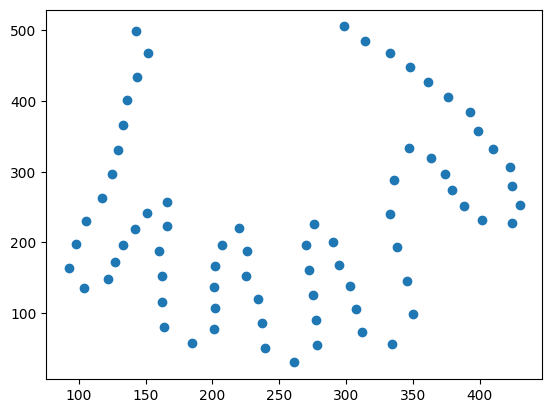

In [ ]:
#Assignment 4 for Foundations of Data Analysis Class (PCA and Logistic Regression)
from numpy.ma.core import var

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

print("A) Printing Average Hand")
handData = np.loadtxt('all-hands.dat',dtype= int, delimiter=',')


avghand = np.average(handData, axis=0)

avgx = []
avgy = []

avgx, avgy = [avghand[i] for i in range(0, len(avghand), 2)], [avghand[i+1] for i in range(0, len(avghand), 2)]

plt.scatter(avgx,avgy)

handDataCen = handData - avghand


In [ ]:
print("B) Total Variance")

covData = np.matmul(np.transpose(handDataCen), handDataCen)*1/(handDataCen.shape[0] - 1)
eigenvalues, eigenvectors = np.linalg.eig(covData)
tot_variance = 0
for i in eigenvalues:
  tot_variance+=i

print("Total Variance is: " + str(48685.068))
print("C) Covariance/Correlation")


print("Covariance between x1 and x2 is: " + str(covData[0][2]))

#Find variances
varx1 = 0
varx2 = 0

for i in range(18):
  varx1+= handDataCen[i][0]**2
  varx2+= handDataCen[i][2]**2
varx1 = 1/17*varx1
varx2 = 1/17*varx2

stdev = np.sqrt(varx1*varx2)
correlation = (covData[0][2])/stdev

print("Correlation between x1 and x3 is: " + str(correlation))
print("These are very correlated because they are both most likely going to be close to each other regardless of the positioning of the hand because they are adjacent points.")

print("D) Computing Eigenvalues and Eigenvectors")


B) Total Variance
Total Variance is: 48685.068
C) Covariance/Correlation
Covariance between x1 and x2 is: 533.1111111111111
Correlation between x1 and x3 is: 0.9934131321568844
These are very correlated because they are both most likely going to be close to each other regardless of the positioning of the hand because they are adjacent points.
D) Computing Eigenvalues and Eigenvectors


E) Scree Plot
There are 17 non zero Principal Components. This tells us that the variance of our dataset has a lot of unnecessary features that don't contribute much to the total variance of the dataset, as the dataset turns into 0 after 17ish on the x axis.


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


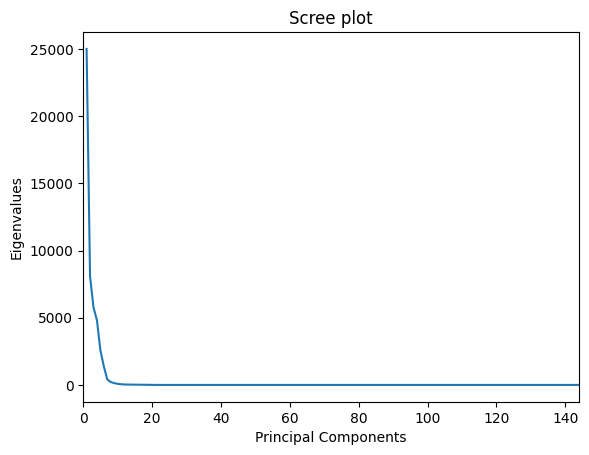

In [ ]:
print("E) Scree Plot")
variance_explained = [(i / tot_variance) for i in eigenvalues]
plt.plot(range(1, len(eigenvalues)+1), eigenvalues)
plt.xlim([0, 144])
plt.title('Scree plot')
plt.xlabel("Principal Components")
plt.ylabel("Eigenvalues")
sum=0
for i in eigenvalues:
  if(i>0.001):
    sum+=1
print("There are " + str(sum) + " non zero Principal Components. This tells us that the variance of our dataset has a lot of unnecessary features that don't contribute much to the total variance of the dataset, as the dataset turns into 0 after 17ish on the x axis.")


F) Plotting PCAs
The dimension represents how much the hand will change to capture the most pattern in the data and the most variance.
So the first Principal Component captures the direction that has the most variance and catches the main patterns in the data


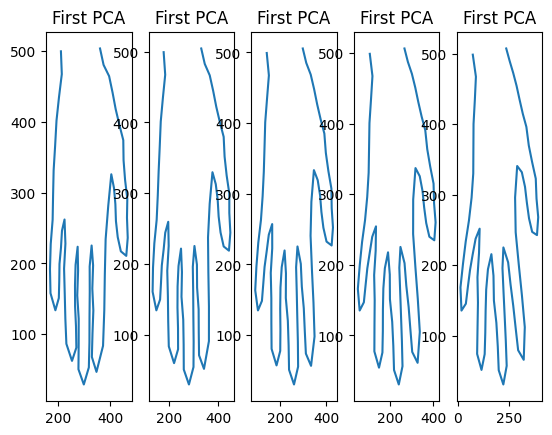

In [ ]:
print("F) Plotting PCAs")
#NOTE THE EIGENVECTORS ARE STORED AS ROWS

lam1 = eigenvalues[0]

s_val= [-3*np.sqrt(lam1)*eigenvectors[:,0],-1.5*np.sqrt(lam1)*eigenvectors[:,0],0,1.5*np.sqrt(lam1)*eigenvectors[:,0],3*np.sqrt(lam1)*eigenvectors[:,0]]


for i in range(5):
  tempx = []
  tempy = []

  temp = avghand +np.full((len(avghand),), s_val[i])
  tempx, tempy = [temp[i] for i in range(0, len(temp), 2)], [temp[i+1] for i in range(0, len(temp), 2)]
  plt.subplot(1,5,i+1)

  plt.plot(tempx,tempy)
    
  plt.title('First PCA')

print("The dimension represents how much the hand will change to capture the most pattern in the data and the most variance.")
print("So the first Principal Component captures the direction that has the most variance and catches the main patterns in the data")

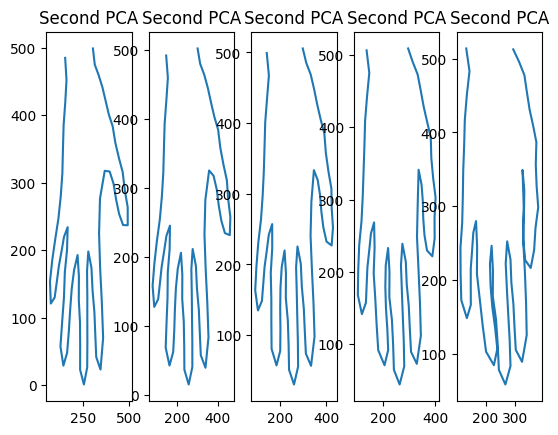

In [ ]:
lam2 = eigenvalues[1]

s_val2= [-3*np.sqrt(lam2)*eigenvectors[:,1],-1.5*np.sqrt(lam2)*eigenvectors[:,1],0,1.5*np.sqrt(lam2)*eigenvectors[:,1],3*np.sqrt(lam2)*eigenvectors[:,1]]


for i in range(5):
  tempx = []
  tempy = []

  temp = avghand +np.full((len(avghand),), s_val2[i])
  tempx, tempy = [temp[i] for i in range(0, len(temp), 2)], [temp[i+1] for i in range(0, len(temp), 2)]
  plt.subplot(1,5,i+1)
  plt.plot(tempx,tempy)
    
  plt.title('Second PCA')


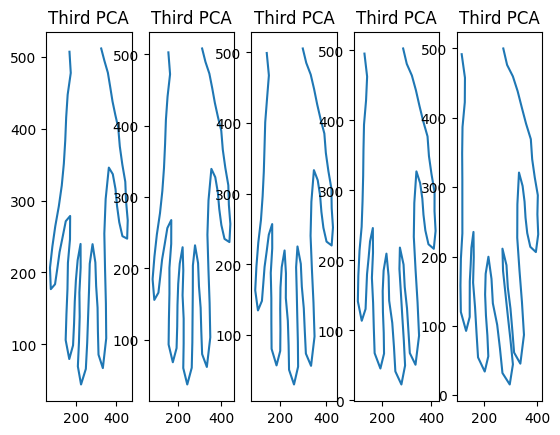

In [ ]:
lam3 = eigenvalues[2]

s_val3= [-3*np.sqrt(lam3)*eigenvectors[:,2],-1.5*np.sqrt(lam3)*eigenvectors[:,2],0,1.5*np.sqrt(lam3)*eigenvectors[:,2],3*np.sqrt(lam3)*eigenvectors[:,2],]


for i in range(5):
  tempx = []
  tempy = []

  temp = avghand +np.full((len(avghand),), s_val3[i])
  tempx, tempy = [temp[i] for i in range(0, len(temp), 2)], [temp[i+1] for i in range(0, len(temp), 2)]
  plt.subplot(1,5,i+1)
  plt.plot(tempx,tempy)
    
  plt.title('Third PCA')

In [ ]:
print("G) How many for 95%?")
prop = 0
numdim=0
while not prop >= 0.95:
  prop +=variance_explained[numdim]
  numdim+=1
print("We need 5 dimensions to represent 95% of the variance ")



G) How many for 95%?
We need 5 dimensions to represent 95% of the variance 


H) The vector of weights is computed by multiplying the first data point by the Principal Components 
[-51.3701075 +0.j -53.71856104+0.j 115.91396854+0.j -85.52738177+0.j
  31.65320845+0.j]
The hand is very similar to the original with only a few mishaps


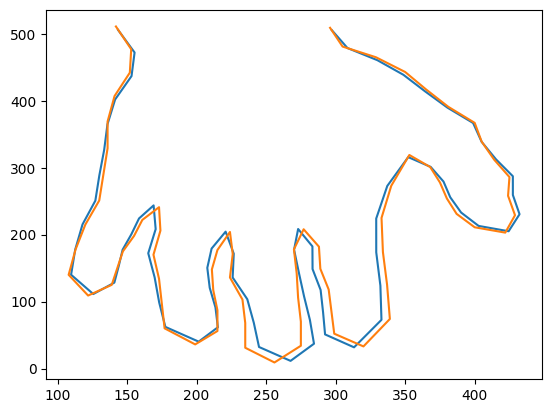

In [ ]:
row1 = np.array(handDataCen[0])
pcs = eigenvectors[:,:5].T

proj = np.zeros(144, dtype=complex)



for pc in pcs:
    dot_prod = (np.dot(row1, pc)/(np.linalg.norm(pc) ** 2))
    
    proj+=np.multiply(pc, dot_prod)

weights = proj
proj = proj+avghand
origx, origy = [handData[0][i] for i in range(0, len(handData[0]), 2)], [handData[0][i+1] for i in range(0, len(handData[0]), 2)]

projx, projy = [proj[i].real for i in range(0, len(proj), 2)], [proj[i+1].real for i in range(0, len(proj), 2)]

plt.plot(projx,projy)
plt.plot(origx,origy)

print("H) The vector of weights is computed by multiplying the first data point by the Principal Components ")
print(np.dot(row1, pcs.T))
print("The hand is very similar to the original with only a few mishaps")

PART 2: Logistic Regression and Gradient Descent

A) Scaled Data
B) Tune Learning Rate (I picked 0.1)
C)


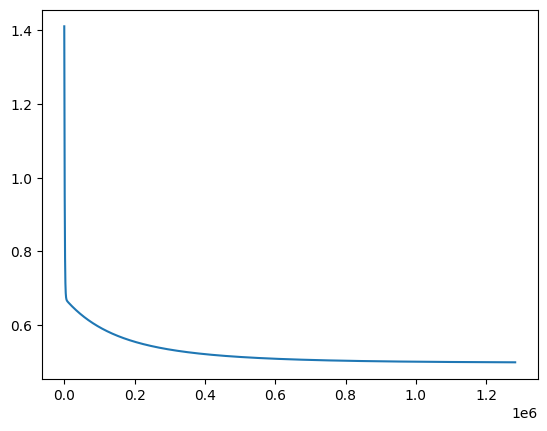

In [ ]:
import math

print("A) Scaled Data")

OasData = pd.read_csv(r'OASIS-hippocampus.csv')
TrainOasData = OasData[OasData['TrainData'] == 1]
TestOasData = OasData[OasData['TrainData'] == 0]


cols_to_keep = ['LeftHippoVol', 'RightHippoVol']
Dementia = ['Dementia']

# Drop all other columns
TestOasFeat = TestOasData.drop([col for col in TestOasData.columns if col not in cols_to_keep], axis=1)
TestOasFeat = TestOasFeat.reset_index(drop=True)

TestOasFeat['LeftHippoVol'] = TestOasFeat['LeftHippoVol'] / TestOasFeat['LeftHippoVol'].max()
TestOasFeat['RightHippoVol'] = TestOasFeat['RightHippoVol'] / TestOasFeat['RightHippoVol'].max()

Test_intercepts = pd.DataFrame(int(1), index=range(len(TestOasFeat)), columns = range(1))
TestOasFeat.insert(0, 'Intercept', Test_intercepts)
scaletestdata = TestOasFeat.to_numpy()
Test_DEM = TestOasData.drop([col for col in TestOasData.columns if col not in Dementia], axis=1)
Test_DEM = Test_DEM.reset_index(drop=True)

testdementia = Test_DEM.to_numpy()

TrainOasFeat = TrainOasData.drop([col for col in TrainOasData.columns if col not in cols_to_keep], axis=1)
TrainOasFeat = TrainOasFeat.reset_index(drop=True)

TrainOasFeat['LeftHippoVol'] = TrainOasFeat['LeftHippoVol'] / TrainOasFeat['LeftHippoVol'].max()
TrainOasFeat['RightHippoVol'] = TrainOasFeat['RightHippoVol'] / TrainOasFeat['RightHippoVol'].max()
Train_DEM = TrainOasData.drop([col for col in TrainOasData.columns if col not in Dementia], axis=1)
Train_DEM = Train_DEM.reset_index(drop=True)

Train_intercepts = pd.DataFrame(int(1), index=range(len(TrainOasFeat)), columns = range(1))
TrainOasFeat.insert(0, 'Intercept', Train_intercepts)

scaletraindata = TrainOasFeat.to_numpy()
traindementia = Train_DEM.to_numpy()



loglikelihoods = []

#int b1, b2

def logReg(z):
  return 1/(1+np.exp(-z))



print("B) Tune Learning Rate (I picked 0.1)")
def GradientDescent(X):
  weights = [random.random(), random.random(), random.random()]
  step = 0.001
  n = len(traindementia)
  y = traindementia[:, 0]
  iteration = 0
  iters = []
  negloglikelihoods = []
  grad= [0.3,0.1,0.5]
  while(grad[0]>0.001 or grad[1]>0.001 or grad[2]>0.001):
    iters.append(iteration)
    z = np.dot(X, weights)
    h = logReg(z)

    cost = (-1/n) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    negloglikelihoods.append(cost)
    grad = (1/n) * np.dot(X.T, (h-y))
    
    weights = weights - step * grad
    iteration+=1
  return weights, negloglikelihoods, iters


weights, neg_log_likelihoods, iterations = GradientDescent(scaletraindata)

plt.plot(iterations,neg_log_likelihoods)

print("C)")


D) Orange = Healthy, Blue = Dementia


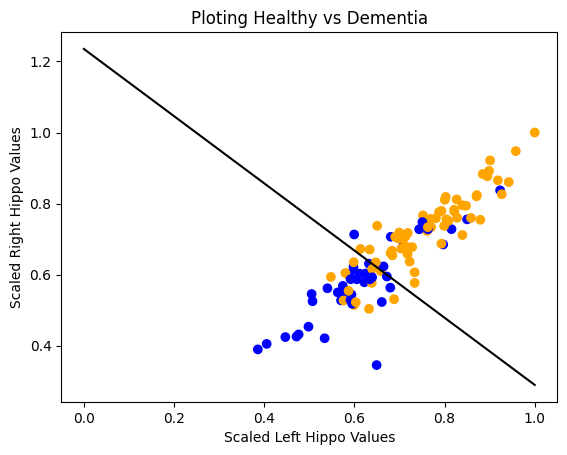

In [ ]:
print("D) Orange = Healthy, Blue = Dementia")
itr = 0
colors = []
labels = []
for i in traindementia:
  if(i== 0):
    colors.append("orange")
    labels.append("Healhty")
  else:
    colors.append("blue")
    labels.append("Dementia")
#orange = healthy
plt.scatter(scaletraindata[:,1],scaletraindata[:,2], c=colors)

plt.xlabel('Scaled Left Hippo Values')
plt.ylabel('Scaled Right Hippo Values')
plt.title("Ploting Healthy vs Dementia")

vals = []
z = np.dot(scaletraindata, weights)
h = logReg(z)

m = -weights[1] / weights[2]
b = -weights[0] / weights[2]

x_line = np.linspace(0, 1, 100)

y_line = m*x_line + b

plt.plot(x_line, y_line, color='black')

In [ ]:
results = []
for i in scaletestdata:

  z = np.dot(i, weights)
  h = logReg(z)
  results.append(round(h,0))

hits = 0
for i in range(len(results)):
  if(results[i]==testdementia[i]):
    hits+=1
print("E) Final Accuracy of my model was: " + str(100*(hits/len(testdementia)))+"%")
print("This is very similar to my naive bayes but was a little bit worse, that could be due to how i implemented either or.")


E) Final Accuracy of my model was: 67.2566371681416%
This is very similar to my naive bayes but was a little bit worse, that could be due to how i implemented either or.
